# Logistic Regression

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
bank=pd.read_csv('bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank=pd.get_dummies(bank,columns=['marital','default','contact','housing','loan','y'],drop_first=True)
bank

,age,job,education,balance,day,month,duration,campaign,pdays,previous,poutcome,marital_married,marital_single,default_yes,contact_telephone,contact_unknown,housing_yes,loan_yes,y_yes
0,58,management,tertiary,2143,5,may,261,1,-1,0,unknown,1,0,0,0,1,1,0,0
1,44,technician,secondary,29,5,may,151,1,-1,0,unknown,0,1,0,0,1,1,0,0
2,33,entrepreneur,secondary,2,5,may,76,1,-1,0,unknown,1,0,0,0,1,1,1,0
3,47,blue-collar,unknown,1506,5,may,92,1,-1,0,unknown,1,0,0,0,1,1,0,0
4,33,unknown,unknown,1,5,may,198,1,-1,0,unknown,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,825,17,nov,977,3,-1,0,unknown,1,0,0,0,0,0,0,1
45207,71,retired,primary,1729,17,nov,456,2,-1,0,unknown,0,0,0,0,0,0,0,1
45208,72,retired,secondary,5715,17,nov,1127,5,184,3,success,1,0,0,0,0,0,0,1
45209,57,blue-collar,secondary,668,17,nov,508,4,-1,0,unknown,1,0,0,1,0,0,0,0


In [7]:
bank1=bank.drop(['job','education','marital_single','contact_unknown','campaign','day','month','duration','pdays','previous','poutcome'],axis=1)
bank1

,age,balance,marital_married,default_yes,contact_telephone,housing_yes,loan_yes,y_yes
0,58,2143,1,0,0,1,0,0
1,44,29,0,0,0,1,0,0
2,33,2,1,0,0,1,1,0
3,47,1506,1,0,0,1,0,0
4,33,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,1,0,0,0,0,1
45207,71,1729,0,0,0,0,0,1
45208,72,5715,1,0,0,0,0,1
45209,57,668,1,0,1,0,0,0


<AxesSubplot:xlabel='y_yes', ylabel='age'>

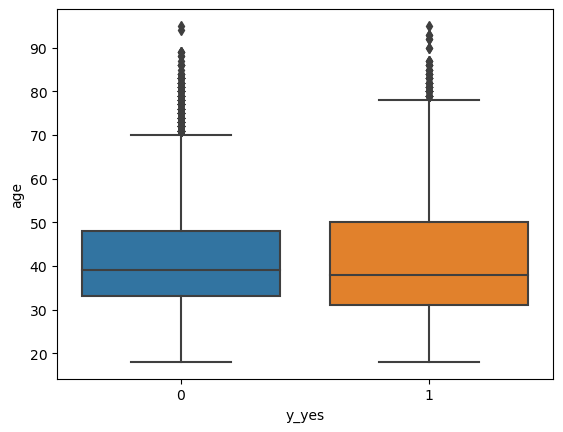

In [8]:
sb.boxplot(x="y_yes",y="age",data=bank1) 

<AxesSubplot:xlabel='y_yes', ylabel='count'>

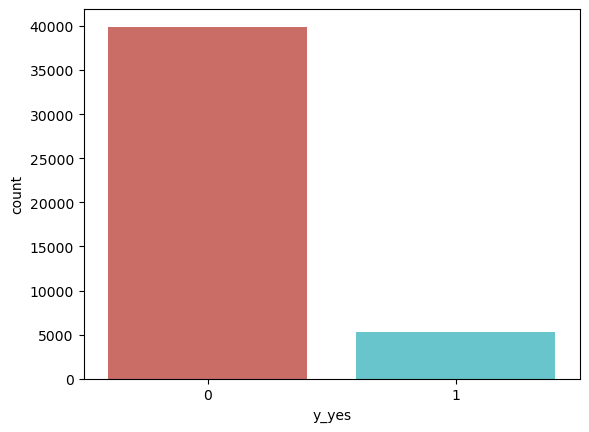

In [9]:
sb.countplot(x="y_yes",data=bank1,palette="hls") 
 

In [10]:
pd.crosstab(bank1.y_yes,bank1.loan_yes)

loan_yes,0,1
y_yes,,
0,33162,6760
1,4805,484


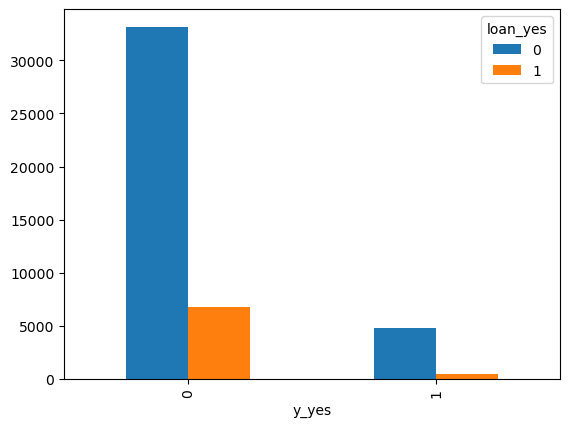

In [11]:
pd.crosstab(bank1.y_yes,bank1.loan_yes).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='housing_yes', ylabel='count'>

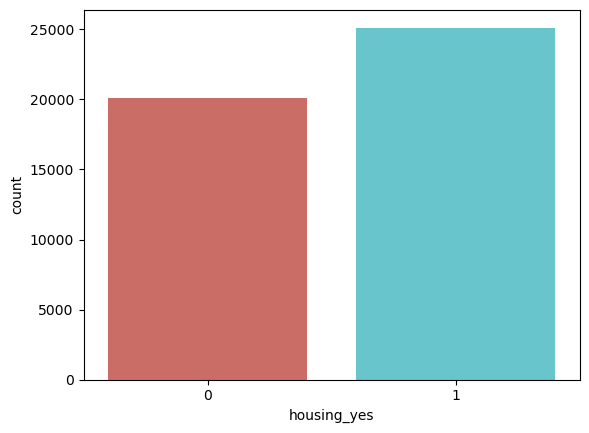

In [12]:
sb.countplot(x="housing_yes",data=bank1,palette="hls")
 

In [13]:
bank1['housing_yes'].value_counts()

1    25130
0    20081
Name: housing_yes, dtype: int64

In [14]:
bank1['loan_yes'].value_counts()

0    37967
1     7244
Name: loan_yes, dtype: int64

<AxesSubplot:xlabel='loan_yes', ylabel='count'>

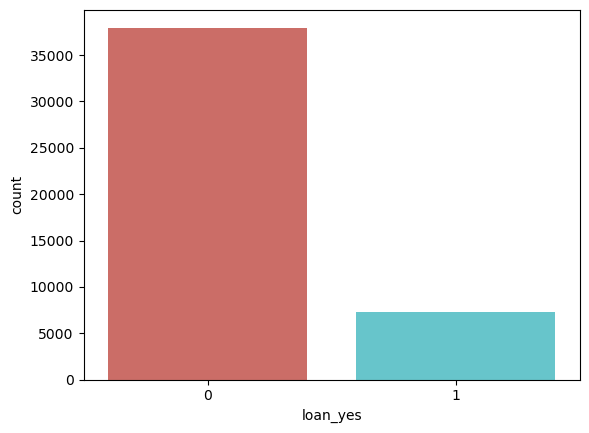

In [15]:
sb.countplot(x="loan_yes",data=bank1,palette="hls")

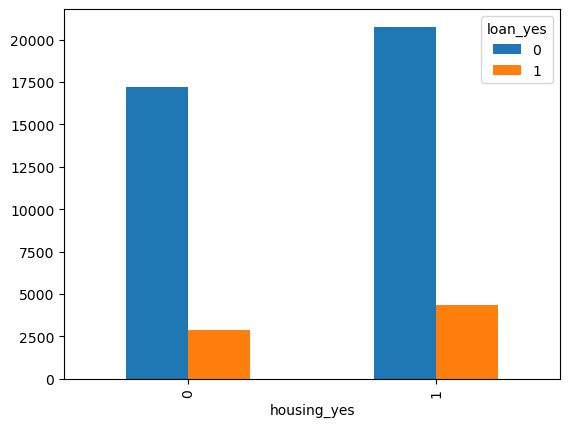

In [16]:
pd.crosstab(bank1.housing_yes,bank1.loan_yes).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='default_yes', ylabel='count'>

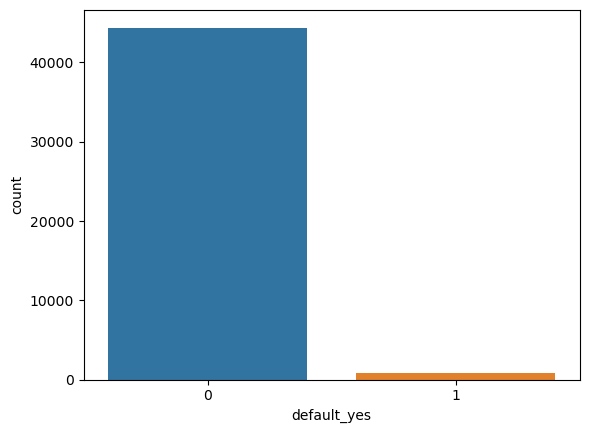

In [17]:
sb.countplot(x='default_yes',data=bank1)

In [18]:
bank1['default_yes'].value_counts()

0    44396
1      815
Name: default_yes, dtype: int64

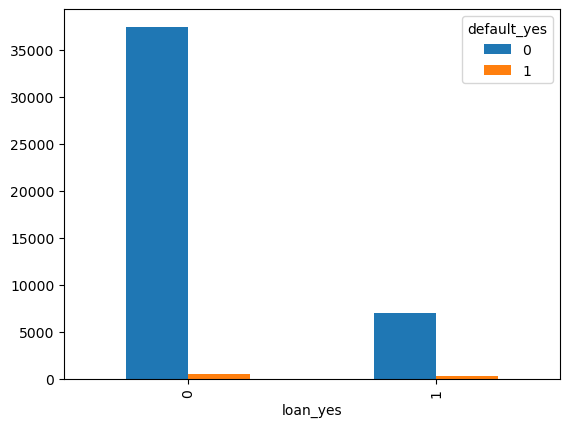

In [19]:
pd.crosstab(bank1.loan_yes,bank1.default_yes).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='marital_married', ylabel='count'>

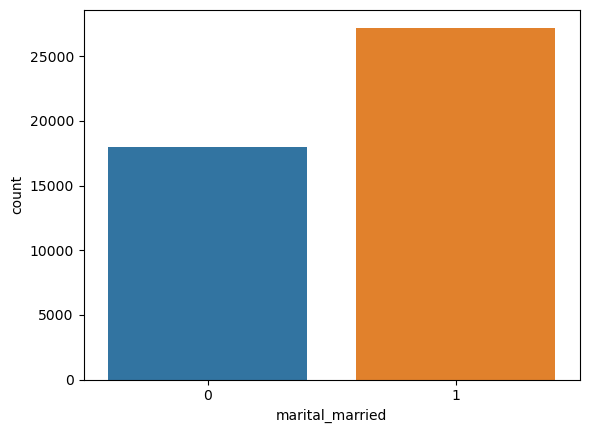

In [20]:
sb.countplot(x='marital_married',data=bank1)

In [21]:
bank1['marital_married'].value_counts()

1    27214
0    17997
Name: marital_married, dtype: int64

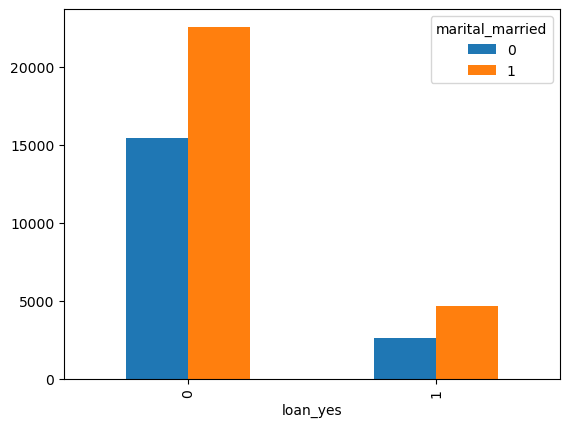

In [22]:
pd.crosstab(bank1.loan_yes,bank1.marital_married).plot(kind='bar')
plt.show()

In [23]:
bank1.isnull().sum()

age                  0
balance              0
marital_married      0
default_yes          0
contact_telephone    0
housing_yes          0
loan_yes             0
y_yes                0
dtype: int64

In [24]:
bank1.shape

(45211, 8)

In [25]:
import warnings
warnings.filterwarnings('ignore')
X = bank1.iloc[:,[0,1,2,3,4,5,6]]
Y = bank1.iloc[:,7]
classifier = LogisticRegression()
classifier.fit(X,Y) 

LogisticRegression()

In [26]:
classifier.coef_

array([[ 3.21859325e-03,  2.76460737e-05, -3.39238454e-01,
        -2.16219663e-01,  4.05092615e-02, -8.46353875e-01,
        -6.79051957e-01]])

In [27]:
classifier.predict_proba (X) # Probability values

array([[0.9210965 , 0.0789035 ],
       [0.90217293, 0.09782707],
       [0.96359785, 0.03640215],
       ...,
       [0.81262737, 0.18737263],
       [0.83403144, 0.16596856],
       [0.8396579 , 0.1603421 ]])

In [28]:
y_pred = classifier.predict(X)
bank1["y_pred"] = y_pred
bank1

,age,balance,marital_married,default_yes,contact_telephone,housing_yes,loan_yes,y_yes,y_pred
0,58,2143,1,0,0,1,0,0,0
1,44,29,0,0,0,1,0,0,0
2,33,2,1,0,0,1,1,0,0
3,47,1506,1,0,0,1,0,0,0
4,33,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,825,1,0,0,0,0,1,0
45207,71,1729,0,0,0,0,0,1,0
45208,72,5715,1,0,0,0,0,1,0
45209,57,668,1,0,1,0,0,0,0


In [29]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank1,y_prob],axis=1)
new_df 

,age,balance,marital_married,default_yes,contact_telephone,housing_yes,loan_yes,y_yes,y_pred,0,1
0,58,2143,1,0,0,1,0,0,0,0.921097,0.078903
1,44,29,0,0,0,1,0,0,0,0.902173,0.097827
2,33,2,1,0,0,1,1,0,0,0.963598,0.036402
3,47,1506,1,0,0,1,0,0,0,0.924865,0.075135
4,33,1,0,0,0,0,0,0,0,0.803991,0.196009
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,1,0,0,0,0,1,0,0.841570,0.158430
45207,71,1729,0,0,0,0,0,1,0,0.775799,0.224201
45208,72,5715,1,0,0,0,0,1,0,0.812627,0.187373
45209,57,668,1,0,1,0,0,0,0,0.834031,0.165969


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39914     8]
 [ 5285     4]]


In [31]:
pd.crosstab(y_pred,Y) 

y_yes,0,1
row_0,,
0,39914,5285
1,8,4


In [32]:
accuracy = sum(Y==y_pred)/bank1.shape[0]
accuracy 

0.8829267213731171

In [34]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.33      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.61      0.50      0.47     45211
weighted avg       0.82      0.88      0.83     45211



In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

0.500277947935324

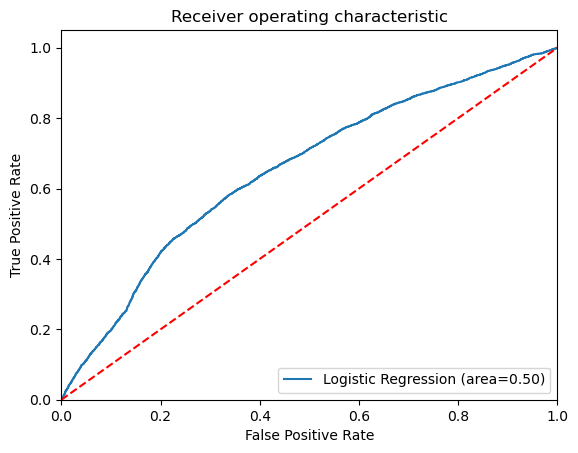

In [36]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [37]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [38]:
y_prob1

,0
0,0.078903
1,0.097827
2,0.036402
3,0.075135
4,0.196009
...,...
45206,0.158430
45207,0.224201
45208,0.187373
45209,0.165969


In [39]:
import statsmodels.api as sm   

In [40]:
logit = sm.Logit(Y, X)   

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Sat, 31 Dec 2022   Pseudo R-squ.:                     inf
Time:                        15:28:51   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0295      0.001    -46.361      0.000      -0.031      -0.028
balance            2.433e-05   3.98e-06      6.112      0.000    1.65e-05    3.21e-05
marital_married      -0.3479      0.031    -11.278      0.000      -0.408      -0.287
default_yes          -0.6652      0.146     -4.544      0.000      -0.952      -0.378
contact_telephone     0.1135      0.059      1.929      0.054      -0.002       0.229
housing_yes          -1.0973      0.029    -38.007      0.000      -1.154      -1.041
loan_yes             -0.7286      0.050    -14.534      0.000      -0.827      -0.630
=====================================================================================
"""

In [43]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.99198437e-01, 9.99248535e-01, 1.00000000e+00])

In [44]:
tpr

array([0., 0., 0., ..., 1., 1., 1.])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
0,1.813040,0.883015
1,0.813040,0.883015
2,0.749198,0.882993
3,0.667951,0.882971
4,0.538213,0.882927
...,...,...
12542,0.029584,0.117781
12543,0.029580,0.117759
12544,0.029533,0.117715
12545,0.029518,0.117693


In [46]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.148251


In [47]:
threshold = 0.148246
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     39922
           1       0.19      0.58      0.28      5289

    accuracy                           0.65     45211
   macro avg       0.55      0.62      0.53     45211
weighted avg       0.84      0.65      0.71     45211

